Confusion matrix plot successfully saved as '64_fig_A_2a.pdf'


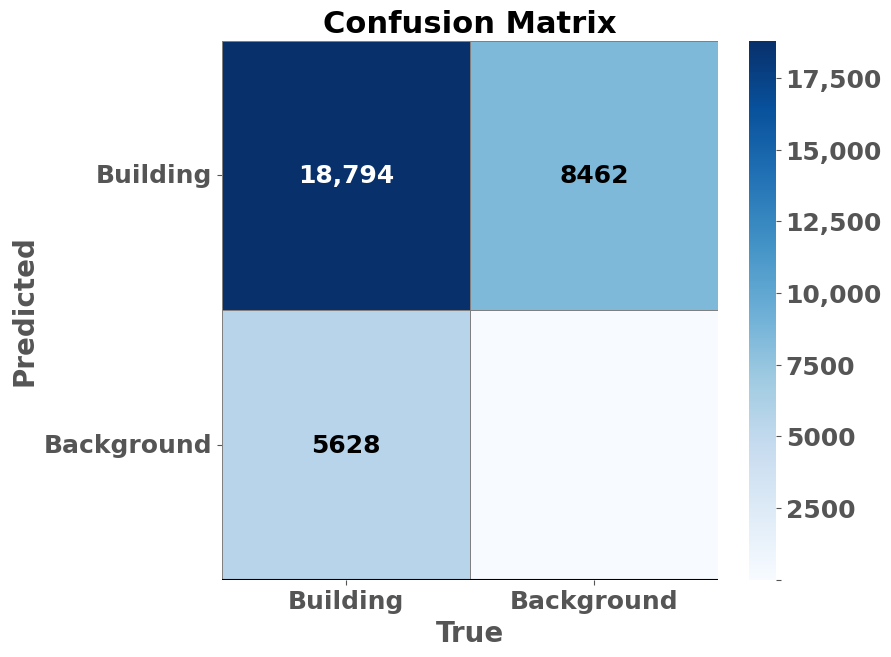

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from typing import List

def plot_confusion_matrix(matrix: np.ndarray, labels: List[str], filename: str):
    """
    Generates and saves a publication-quality confusion matrix plot with
    custom number formatting.

    Args:
        matrix (np.ndarray): The confusion matrix data, e.g., [[TP, FP], [FN, TN]].
        labels (List[str]): The class labels for the x and y axes.
        filename (str): The path to save the output plot file.
    """
    # --- 1. Setup Plot Style and Font ---
    plt.style.use('ggplot')
    font_properties = {
        'family': 'sans-serif',
        'weight': 'bold',
        'size': 20
    }
    plt.rc('font', **font_properties)
    plt.rc('axes', titleweight='bold', labelweight='bold', titlesize=22, labelsize=20)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)

    # --- 2. Define Custom Formatters ---
    def format_number(x):
        """Formats a number, adding a comma for thousands if >= 10,000."""
        if x == 0:
            return ""  # Display zero as an empty string
        if x >= 10000:
            return f"{x:,}"
        return f"{x}"

    def cbar_tick_formatter(x, pos):
        """Formatter for the color bar ticks."""
        return format_number(int(x))

    # Apply the formatter to the data to create the annotation strings
    formatted_annotations = np.vectorize(format_number)(matrix)

    # --- 3. Create the Heatmap Plot ---
    fig, ax = plt.subplots(figsize=(8, 7))

    sns.heatmap(
        matrix,
        annot=formatted_annotations,
        fmt='',  # Use pre-formatted annotations
        cmap='Blues',
        linewidths=0.5,
        linecolor='gray',
        cbar=True,
        xticklabels=labels,
        yticklabels=labels,
        ax=ax,
        annot_kws={"size": 18},
        cbar_kws={'format': mticker.FuncFormatter(cbar_tick_formatter)}
    )

    # --- 4. Customize Annotation Colors ---
    # Set a threshold for when to switch text color from black to white
    color_threshold = matrix.max() / 2.0
    
    # Iterate through text objects to set color based on background
    for text_obj, data_value in zip(ax.texts, matrix.flatten()):
        if data_value > color_threshold:
            text_obj.set_color('white')
        else:
            text_obj.set_color('black')

    # --- 5. Finalize and Save Plot ---
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    
    # Ensure y-axis labels are not rotated
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Add a thin black line at the bottom to match the original image
    ax.axhline(y=len(labels), color='black', linewidth=1.5)

    plt.savefig(filename, format='pdf', bbox_inches='tight')
    print(f"Confusion matrix plot successfully saved as '{filename}'")


if __name__ == '__main__':
    # Define the specific data for the plot
    CONF_MATRIX_DATA = np.array([
        [18794, 8462],  # [TP, FP]
        [5628, 0]       # [FN, TN]
    ])
    
    CLASS_LABELS = ['Building', 'Background']
    OUTPUT_FILENAME = '64_fig_A_2a.pdf'

    # Generate the plot using the refactored function
    plot_confusion_matrix(CONF_MATRIX_DATA, CLASS_LABELS, OUTPUT_FILENAME)